<a href="https://colab.research.google.com/github/WeizmannMLcourse/homework1-ariels1234/blob/main/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantum Parameters Estimation with Neural Networks


In [1]:
# Enabling access to the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Creating a path to my drive for importing the relevant modules
import sys
import os
root_path = "/content/drive/MyDrive/GitHub/Project_CNN/"
sys.path.append(os.path.abspath(root_path))


In [3]:
# Unzipping the Dateset file from the google drive
!unzip '/content/drive/MyDrive/GitHub/Project/Dataset.zip'


Archive:  /content/drive/MyDrive/GitHub/Project/Dataset.zip
replace Dataset/training/repetition=1 omega=1  gamma=1 delta=1 serial=0.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
import matplotlib as plt

In [6]:
# Defining the path to the relevant data
path_to_training_data = '/content/Dataset/training'
path_to_validation_data = '/content/Dataset/validation'

In [23]:
import numpy as np
import shutil, os
from torch.utils.data import Dataset, DataLoader

path = '/content/Dataset/validation'
z=0
import glob
from dataloader import CustomDataset
map = np.zeros((10,10)

filelist = glob.glob(path_to_validation_data+'/*.npy')
# labels1 = np.zeros(len(self.filelist))
for omega in range(10,11):
  for gamma in range(10,11):
    index = [('omega='+str(omega)+'  gamma='+str(gamma)) in x for x in filelist]
    index_p = [i for i, x in enumerate(index) if x]
    for a, i in enumerate(index_p):
      shutil.copy(os.path.join('/content/Dataset/validation',filelist[i]), '/content/Dataset/validation2/'+str(a)+'abc')
      
    validation_ds = CustomDataset(path_to_validation_data) 
    valid_dataloader = DataLoader(validation_ds,batch_size=50)
    map[omega-1,gamma-1] = compute_accuracy_and_loss(valid_dataloader,net)[1]
    
    
    
    shutil.rmtree('/content/Dataset/validation2')  
# for i in index:
#   if i == True:
#     z+=1

print(map)




In [29]:
a = np.zeros((10,10))
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
shutil.rmtree('/content/Dataset/validation2')

In [ ]:
# Generating a list of the files in the directory using glob

import glob

filelist = glob.glob(path_to_training_data+'/*.npy')

#print the first 10 entries:
filelist[:]

['/content/Dataset/training/repetition=88 omega=8  gamma=9 delta=1 serial=78.npy',
 '/content/Dataset/training/repetition=72 omega=2  gamma=8 delta=1 serial=17.npy',
 '/content/Dataset/training/repetition=88 omega=3  gamma=3 delta=1 serial=22.npy',
 '/content/Dataset/training/repetition=25 omega=8  gamma=5 delta=1 serial=74.npy',
 '/content/Dataset/training/repetition=47 omega=5  gamma=7 delta=1 serial=46.npy',
 '/content/Dataset/training/repetition=41 omega=7  gamma=5 delta=1 serial=64.npy',
 '/content/Dataset/training/repetition=64 omega=6  gamma=10 delta=1 serial=59.npy',
 '/content/Dataset/training/repetition=93 omega=3  gamma=2 delta=1 serial=21.npy',
 '/content/Dataset/training/repetition=61 omega=5  gamma=5 delta=1 serial=44.npy',
 '/content/Dataset/training/repetition=12 omega=4  gamma=2 delta=1 serial=31.npy',
 '/content/Dataset/training/repetition=88 omega=9  gamma=4 delta=1 serial=83.npy',
 '/content/Dataset/training/repetition=3 omega=3  gamma=6 delta=1 serial=25.npy',
 '/c

In [30]:
# activating the autoloader 
%load_ext autoreload
%autoreload 2

## Importing the dataloader 



In [31]:
from dataloader import CustomDataset


In [32]:
training_ds = CustomDataset(path_to_training_data, transform=True)
validation_ds = CustomDataset(path_to_validation_data)

some_random_idx = 30
training_ds[some_random_idx]

(tensor([[0.0000e+00, 1.6000e-05, 6.3552e-05,  ..., 6.1290e-03, 6.6793e-03,
          7.2489e-03],
         [0.0000e+00, 1.6000e-05, 6.3552e-05,  ..., 6.1290e-03, 6.6793e-03,
          7.2489e-03],
         [0.0000e+00, 1.6000e-05, 6.3552e-05,  ..., 6.1290e-03, 6.6793e-03,
          7.2489e-03]], dtype=torch.float64), tensor(36))

## Creating the dataloader

In [33]:
from torch.utils.data import Dataset, DataLoader

training_dataloader = DataLoader(training_ds,batch_size=300,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=300)

In [ ]:
# check
for x,y in training_dataloader:
    print(x.shape, y.shape)
    break

torch.Size([300, 3, 5000]) torch.Size([300])


# Importing the nerual network

In [64]:
from model import CNN_Net


In [65]:
net = CNN_Net()

In [ ]:
# checking the size of our model
z=net(x.float())
print(z)

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.nn import Conv1d,ReLU,MaxPool1d,Linear
net = nn.Sequential(Conv1d(3, 64, kernel_size=3, stride=1, padding=1)
            ,ReLU(inplace=True)
            ,MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            ,Conv1d(64, 128, kernel_size=3, stride=1, padding=1)
            ,ReLU(inplace=True)
            ,MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            ,Conv1d(128, 256, kernel_size=3, stride=1, padding=1)
            ,ReLU(inplace=True)
             # 300, 256, 2500
            ,Conv1d(256, 256, kernel_size=3, stride=1, padding=1)
            ,ReLU(inplace=True)
            ,MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            ,Conv1d(256, 512, kernel_size=3, stride=1, padding=1)
            ,ReLU(inplace=True)
            ,Conv1d(512, 512, kernel_size=3, stride=1, padding=1)
            ,ReLU(inplace=True)
            ,MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            ,Conv1d(512, 512, kernel_size=3, stride=1, padding=1)
            ,ReLU(inplace=True)
                        ,Conv1d(512, 512, kernel_size=3, stride=1, padding=1)
            ,ReLU(inplace=True)
            # 300, 512, 312
            ,MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            # 300, 512, 156
)



z = net(x.float())


In [ ]:
torch.flatten(z,1).shape

torch.Size([300, 79872])

## Training


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 

In [66]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0
    loss = 0
    
    if torch.cuda.is_available():
        net.cuda()
    net.eval()
    
    n_batches = 0
    with torch.no_grad():
        for x,y in dataloader:
            n_batches+=1
            
            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
  
            pred = net(x.float())

            loss+= loss_func(pred, y).item() 
            
            pred = torch.argmax(pred,dim=1)


            correct+=len(torch.where((pred==y))[0]) 
            total+=len(y)
            
    loss = loss/n_batches   
      
    return correct/total, loss

In [71]:
net.load_state_dict(torch.load('/content/drive/MyDrive/GitHub/Project_CNN/trained_model.pt',map_location='cpu'))

<All keys matched successfully>

In [72]:
net.eval()
net.cpu()
# predicted = net( x.unsqueeze(1) )[0][0].data.numpy()

CNN_Net(
  (features): Sequential(
    (0): Conv1d(3, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU(inplace=True)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): ReLU(inplace=True)
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): ReLU(inplace=True)
    (8): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (9): ReLU(inplace=True)
    (10): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(1,))
    (12): ReLU(inplace=True)
    (13): Conv1d(512, 512, kernel_size=(3,), stride=(1,), padding=(1,))
    (14): ReLU(inplace=True)
    (15): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv1d(512, 512, kernel

In [60]:
import numpy as np
import shutil, os
from torch.utils.data import Dataset, DataLoader

path = '/content/Dataset/validation'
z=0
import glob
from dataloader import CustomDataset
map = np.zeros((10,10))
filelist = glob.glob(path_to_validation_data+'/*.npy')
# labels1 = np.zeros(len(self.filelist))
for omega in range(2,3):
  for gamma in range(10,11):
    index = [('omega='+str(omega)+'  gamma='+str(gamma)) in x for x in filelist]
    index_p = [i for i, x in enumerate(index) if x]
    for a, i in enumerate(index_p):
      shutil.copy(os.path.join('/content/Dataset/validation',filelist[i]), '/content/Dataset/validation_map/'+str(a))
      
    validation_ds = CustomDataset(path_to_validation_data) 
    valid_dataloader = DataLoader(validation_ds,batch_size=50)
    map[omega-1,gamma-1] = compute_accuracy_and_loss(valid_dataloader,net)[0]

    files = glob.glob('/content/Dataset/validation_map/*')
    for f in files:
        os.remove(f)
    # shutil.rmtree('/content/Dataset/validation_map/*')  
# for i in index:
#   if i == True:
#     z+=1

print(map)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [73]:
plt.plot(map)

AttributeError: ignored

In [ ]:
|compute_accuracy_and_loss(training_dataloader,net)

(0.0101, 4.610925113453584)

In [ ]:
compute_accuracy_and_loss(valid_dataloader,net)

(0.0094, 4.610863405115464)

In [ ]:
if torch.cuda.is_available():
    net.cuda()

In [ ]:
from tqdm.notebook import tqdm
import time

n_epochs = 150

t0=time.time()
training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm(range(n_epochs))

for epoch in pbar:
    t1=round((time.time()-t0)/60)
    if len(training_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
        ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))
        print(epoch, 'train loss',training_loss_vs_epoch[-1],'acc', (training_acc_vs_epoch[-1]),' Time: ', round(t1))
    
    net.train() # put the net into "training mode"
    
    for x,y in training_dataloader:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()

        optimizer.zero_grad()
        output = net(x.float())
        loss = loss_func(output,y) 
        loss.backward()
        optimizer.step()

    
    net.eval() #put the net into evaluation mode
    
    
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)
         
    training_loss_vs_epoch.append(train_loss)    
    training_acc_vs_epoch.append(train_acc)
    
    validation_acc_vs_epoch.append(valid_acc)
    
    validation_loss_vs_epoch.append(valid_loss)
    
    #save the model if the validation loss has decreased
    # if len(validation_loss_vs_epoch)==1 or validsation_loss_vs_epoch[-2] > validation_loss_vs_epoch[-1]:
    #     torch.save(net.state_dict(), '/content/gdrive/MyDrive/Deep_learning/Lesson 1/HW1/trained_model.pt')
    if len(validation_loss_vs_epoch)==1 or validation_loss_vs_epoch[-2] > validation_loss_vs_epoch[-1]:
        torch.save(net.state_dict(), '/content/drive/MyDrive/GitHub/Project_CNN/trained_model_small_net.pt')
    
    

2 train loss 3.8988447680192837 acc 0.0468  Time:  1
3 train loss 3.450974436367259 acc 0.1235  Time:  1
4 train loss 3.1604597989250633 acc 0.1695  Time:  1
5 train loss 2.9437530461479637 acc 0.1953  Time:  1
6 train loss 2.8199073356740616 acc 0.2051  Time:  1
7 train loss 2.6368070560343124 acc 0.275  Time:  2
8 train loss 2.5237611602334415 acc 0.3079  Time:  2
9 train loss 2.412808523458593 acc 0.321  Time:  2
10 train loss 2.3249763039981617 acc 0.3307  Time:  2
11 train loss 2.277961443452274 acc 0.3544  Time:  2
12 train loss 2.198211999500499 acc 0.3674  Time:  3
13 train loss 2.0920932924046234 acc 0.3779  Time:  3
14 train loss 1.9875943906166975 acc 0.4273  Time:  3
15 train loss 2.0387817130369297 acc 0.3704  Time:  3
16 train loss 1.9274745618595797 acc 0.4314  Time:  3
17 train loss 1.9036541511030758 acc 0.4159  Time:  4


KeyboardInterrupt: ignored

In [ ]:
# Loading a pretrained net
# net.load_state_dict(torch.load('/content/drive/MyDrive/Deep_learning/Lesson 2/HW2-part2/trained_model1.pt',map_location='cpu'))

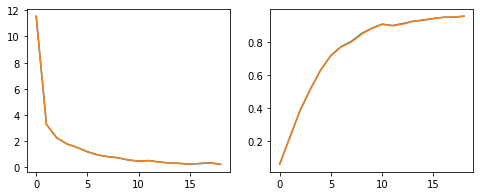

In [ ]:
# plotting the result

import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='training')
ax[0].plot(validation_loss_vs_epoch,label='validation')

ax[1].plot(training_acc_vs_epoch)
ax[1].plot(validation_acc_vs_epoch)

plt.show()

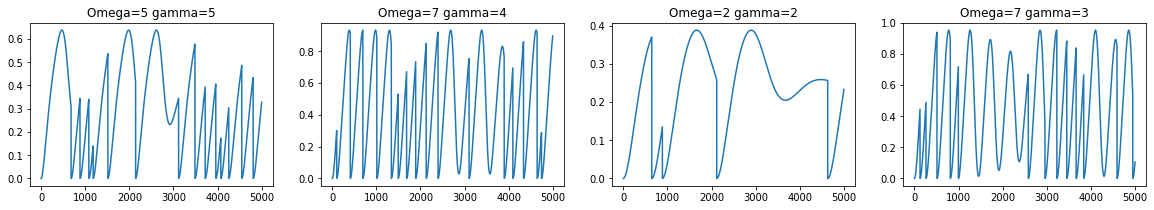

In [ ]:
# Plotting some graphs
fig,ax = plt.subplots(1,4, figsize=(20,3))
for index in range(4):
  data, omega, gamma = training_ds[index]
  ax[index].plot(data)
  ax[index].title.set_text(f"Omega={omega+1} gamma={gamma+1}")
plt.show()